# [Monte Carlo Simulation](http://zwmiller.com/projects/monte_carlo_part2.html)

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy
%matplotlib inline
plt.style.use('seaborn')

# Problem 1
- Given 
    + Row = today meal
    + Column = tomorrow meal given today meal

|      -      	| **Beef** 	| **Chicken** 	| **Veg** 	|
|:-----------:	|:--------:	|:-----------:	|:-------:	|
|   **Beef**  	|    25%   	|     50%     	|   25%   	|
| **Chicken** 	|    75%   	|     20%     	|    5%   	|
|   **Veg**   	|    50%   	|     50%     	|    0%   	|

- Calculate the chance to eat beef today

In [2]:
dinner_matrix = \
    [[.25, .5, .25],
     [.75, .2, .05],
     [.50, .5, 0.0]]

In [3]:
from enum import IntEnum

class Meal(IntEnum):
    BEEF = 0
    CHICKEN = 1
    VEG = 2

starting_meal = np.random.choice(Meal)
print(starting_meal)

2


In [4]:
def simulate(starting_meal: int, N: int=100000):
    meal_counter: dict = {Meal.BEEF: 0, Meal.CHICKEN: 0, Meal.VEG: 0}
    beef_percentage_over_time: list = []    # For plotting

    # Simulate
    meal = starting_meal
    meal_counter[meal] += 1
    for i in range(N):
        meal = np.random.choice(
            Meal, p=dinner_matrix[meal])
        meal_counter[meal] += 1
        beef_percentage_over_time.append(meal_counter[Meal.BEEF] / (i+1))
    
    return beef_percentage_over_time

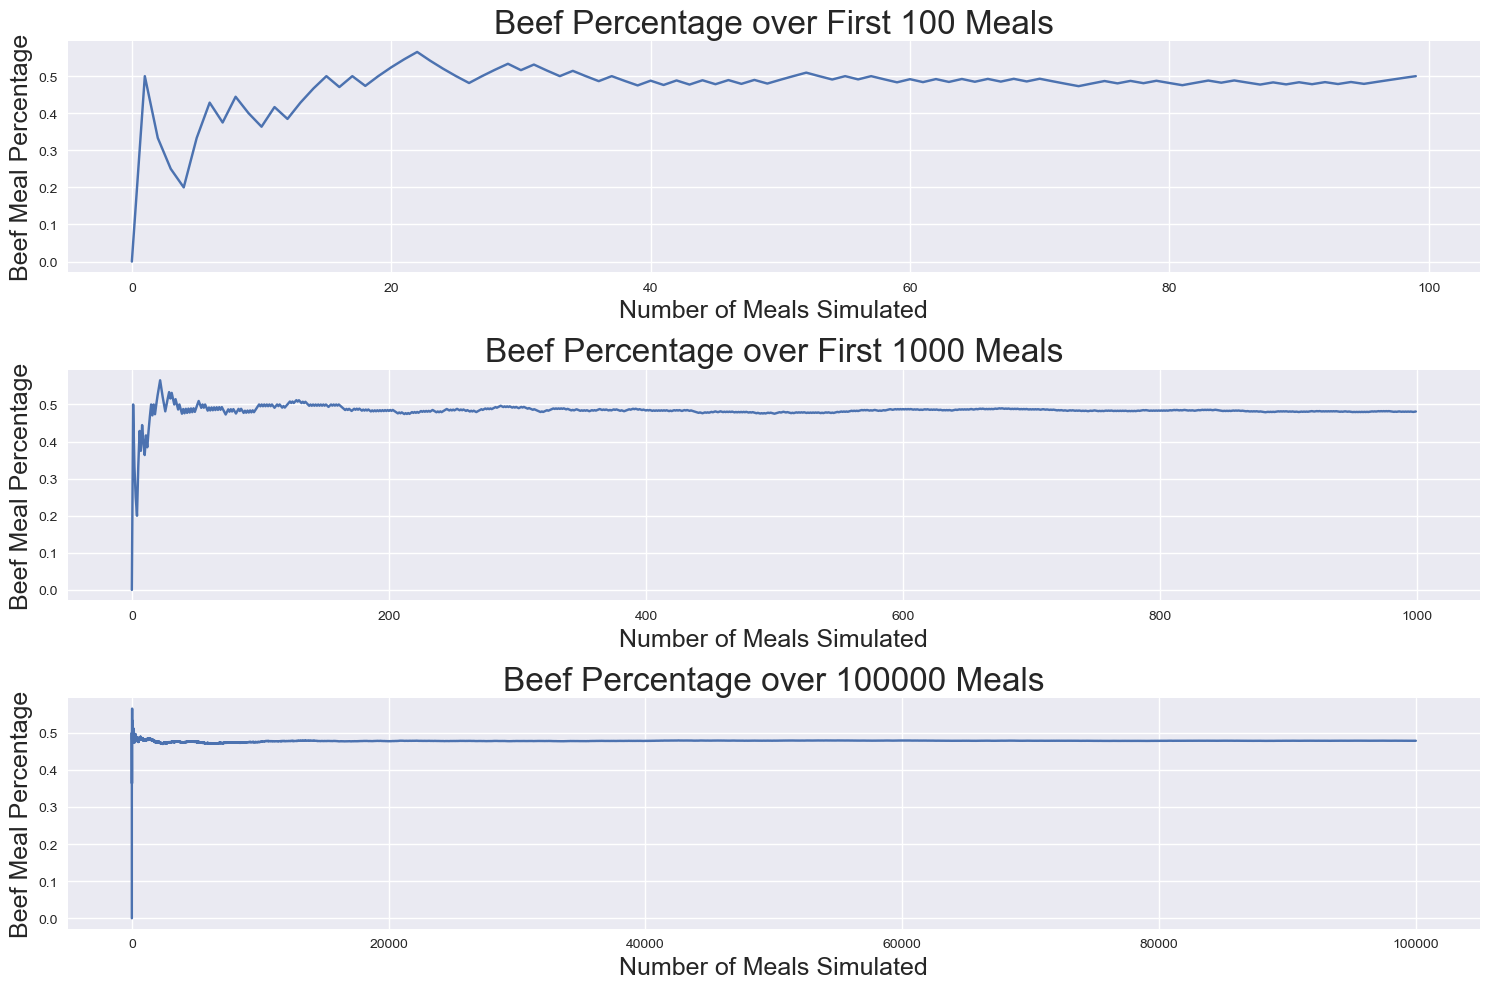

In [5]:
beef_percentage_over_time = simulate(starting_meal, N=100000)

#### Plot ####
fig, ax = plt.subplots(
    nrows=3, ncols=1,
    dpi=100,
    figsize=(15,10))

# Fig 0: N=100
ax[0].plot(
    range(100), beef_percentage_over_time[:100])
ax[0].set_title("Beef Percentage over First 100 Meals", fontsize=24);
ax[0].set_xlabel("Number of Meals Simulated", fontsize=18)
ax[0].set_ylabel("Beef Meal Percentage", fontsize=18)

# Fig 1: N=1000
ax[1].plot(
    range(1000), beef_percentage_over_time[:1000])
ax[1].set_title("Beef Percentage over First 1000 Meals", fontsize=24);
ax[1].set_xlabel("Number of Meals Simulated", fontsize=18)
ax[1].set_ylabel("Beef Meal Percentage", fontsize=18)

# Fig 2: N=1000
ax[2].plot(
    range(100000), beef_percentage_over_time);
ax[2].set_title("Beef Percentage over 100000 Meals", fontsize=24);
ax[2].set_xlabel("Number of Meals Simulated", fontsize=18)
ax[2].set_ylabel("Beef Meal Percentage", fontsize=18)

plt.tight_layout()

# Problem 2: Random Walk
- A drunken man in a 10x10 room
    - Has a starting position
    - A goal
    - take a random step 
        + size = 1
        + direction: randomly 0-360 degree
- Calculate the chance the walker succeeded within 50 steps

<img src="./img/1.png" width="400"/>


## 1. Model

In [6]:
def take_step(position, step_size):
    """
    Takes a random step
    Input: (x, y) position in a list
    Output: (x, y) updated, in a list
    """
    def convert_degrees_to_rads(degrees):
        """
        Input: degrees (0-360) int
        Output: float, angle in radians
        """
        return float(((2*np.pi)/360)*degrees)

    # Random an angle
    angle_degrees = np.random.randint(0,360)
    angle_radians = convert_degrees_to_rads(angle_degrees)

    # Update position
    new_x = position[0] + step_size*np.cos(angle_radians)
    new_y = position[1] + step_size*np.sin(angle_radians)
    return [new_x, new_y]


def check_the_rules(position, x_range, y_range, goal_range):
    """
    Check if our walker dies, lives, or has succeeded
    Input:
        Position (x, y),
        x_range (low, high), y_range (low, high)
        goal_range (low_x, low_y, high_x, high_y)
    Output: Int (0-dead, 1-live, 2-succeeded)
    """
    x = position[0]
    y = position[1]

    if x < x_range[0] or x > x_range[1]: return 0
    if y < y_range[0] or y > y_range[1]: return 0
    if x > goal_range[0] and y > goal_range[1] and x < goal_range[2] and y < goal_range[3]:
        return 2
    return 1


def simulate_a_walk(
        start_position=None,
        x_range=(0,10), y_range=(0,10),
        number_of_steps=50, step_size=1,
        goal_range=(9,9,10,10)):

    # starting position: chosen or random
    if not start_position or len(start_position) != 2:
        position = [np.random.uniform(x_range[0], x_range[1]), np.random.uniform(y_range[0], y_range[1])]
    else:
        position = start_position

    # simulate
    position_tracker = [position]
    for step in range(number_of_steps):
        # random walk
        position = take_step(position, step_size)
        position_tracker.append(position)

        # check
        survives = check_the_rules(position, x_range, y_range, goal_range)
        if survives == 0 or survives == 2: break

    return position_tracker, survives

## 2. Visualization
#### Visualize a succeeded walk

In [7]:
def draw_path(walk_path):
    x, y = zip(*walk_path)

    plt.figure(dpi=100)

    # Plot path
    plt.plot(x, y)

    # Plot start position
    plt.scatter(
        x=[4], y=[4],
        marker='o',c='k',s=200, zorder=10)

    # Plot destination
    plt.scatter(
        x=x[-1], y=y[-1],
        marker='x', c='r', s=200);
    
    # Plot goal box
    plt.plot([9,10,10,9,9],[9,9,10,10,9],'k--')

    plt.xlabel("X Position")
    plt.ylabel("Y Position")

Succeeded after 13 trials


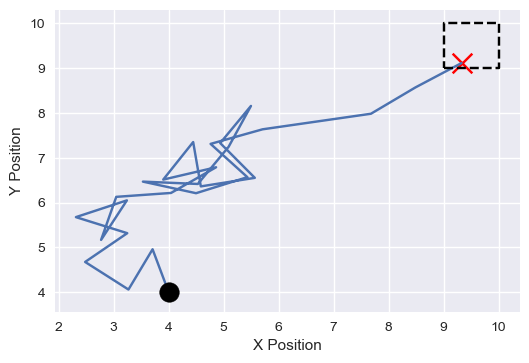

In [8]:
# Visualize a succeeded walk
succeeded = 0
cnt = 0
while succeeded != 2:
    cnt += 1
    walk_path, succeeded = simulate_a_walk(
        start_position=(4, 4),
        number_of_steps=50)

print("Succeeded after {} trials".format(cnt))
draw_path(walk_path)

#### Visualize all walks

In [9]:
def draw_many_paths(walk_paths):
    plt.figure(dpi=100)

    for walk_path in walk_paths:
        x, y = zip(*walk_path)

        # Plot path
        plt.plot(x, y)

        # Plot destination
        plt.scatter(
            x=x[-1], y=y[-1],
            marker='x', c='r', s=200);
    
    # Plot start position
    plt.scatter(
        x=[4], y=[4],
        marker='o',c='k',s=200, zorder=10)

    # Plot goal box
    plt.plot([9,10,10,9,9],[9,9,10,10,9],'k--')

    plt.xlabel("X Position")
    plt.ylabel("Y Position")

Succeeded after 185 trials


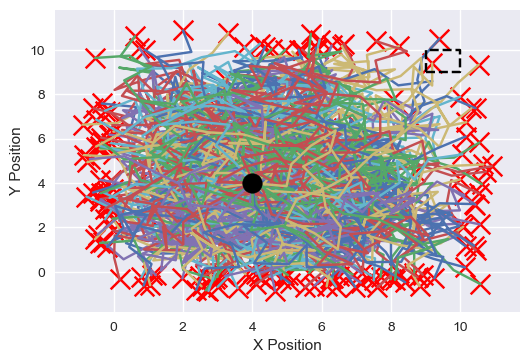

In [10]:
# Visualize all walks
succeeded = 0
cnt = 0
walk_paths = []
while succeeded != 2:
    cnt += 1
    walk_path, succeeded = simulate_a_walk(
        start_position=(4, 4),
        number_of_steps=50)
    walk_paths.append(walk_path)

print("Succeeded after {} trials".format(cnt))
draw_many_paths(walk_paths)

## 3. Chance of successes 
#### Calculate the chance the walker succeeded, N = 10000

In [11]:
results = {0:0, 1:0, 2:0}
N = 10000
for i in range(N):
    walk_path, result = simulate_a_walk(
        start_position=(4,4),
        number_of_steps=50)
    results[result] += 1

print("Success Percentage: {:.2f} %".format(results[2]/N * 100))
print("Still Alive, but no goal: {:.2f} %".format(results[1]/N * 100))
print("Crashed into wall: {:.2f} %".format(results[0]/N*100))

Success Percentage: 0.98 %
Still Alive, but no goal: 16.40 %
Crashed into wall: 82.62 %


#### Calculate the chance the walker succeeded, N variate

In [12]:
survival_esimations = []
cnt = 0
for N in range(1,10000,10):
    cnt += 1
    if cnt % 100 == 0: print("Prgress {}/{}".format(cnt, len(range(1,10000,10))))

    results = {0:0, 1:0, 2:0}
    for i in range(N):
        walk_path, result = simulate_a_walk(
            start_position=(4,4),
            number_of_steps=50)
        results[result] += 1
    survival_esimations.append(results[2]/N)

Prgress 100/1000
Prgress 200/1000
Prgress 300/1000
Prgress 400/1000
Prgress 500/1000
Prgress 600/1000
Prgress 700/1000
Prgress 800/1000
Prgress 900/1000
Prgress 1000/1000


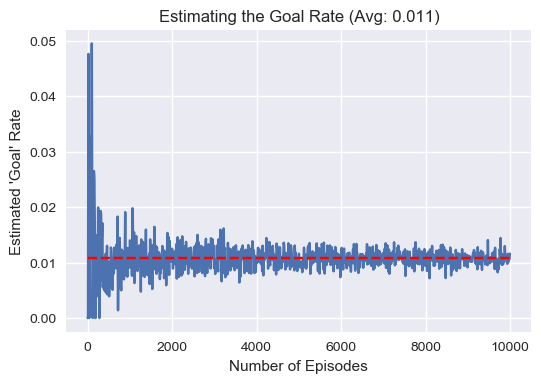

In [13]:
plt.figure(dpi=100)
plt.xlabel("Number of Episodes")
plt.ylabel("Estimated 'Goal' Rate")

plt.plot(
    range(1,10000,10), survival_esimations);
plt.plot(
    [0, 10000], [np.mean(survival_esimations), np.mean(survival_esimations)],
    'r--');

plt.title("Estimating the Goal Rate (Avg: %.3f)"%np.mean(survival_esimations));